In [1]:
# Title: DMRG for Bachelor Thesis
# Author: Aaron Sander
# Date: March-April 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of Matrix Product States (MPS) and Density Matrix
# Renormalization Group (DMRG) for compressing an arbitrary quantum state
# which has relevant applications in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import numpy as np
import math

In [3]:
MPO = init.initialize_quantum_ising_MPO(num_sites=100, J=1, g=1)

Initial Energy: -112.43492974677241
Energy: -124.01323801508052 BondDim: 1
Energy: -124.38181716583534 BondDim: 1
Energy: -124.4022770170193 BondDim: 1
Energy: -124.40247614907422 BondDim: 1
Energy: -126.76704761062624 BondDim: 2
Energy: -126.85334641761908 BondDim: 2
Energy: -126.85566685222598 BondDim: 2
Energy: -126.85577348904066 BondDim: 2
Energy: -126.88755697474845 BondDim: 3
Energy: -126.91756182556317 BondDim: 3
Energy: -126.92095176963804 BondDim: 3
Energy: -126.92105820522531 BondDim: 3
Energy: -126.94454118300833 BondDim: 4
Energy: -126.94860953059846 BondDim: 4
Energy: -126.9499590165277 BondDim: 4
Energy: -126.95081252293451 BondDim: 4
Energy: -126.9555810867744 BondDim: 5
Energy: -126.95699639108032 BondDim: 5
Energy: -126.95710528210209 BondDim: 5
Energy: -126.96066802176136 BondDim: 6
Energy: -126.96111897992651 BondDim: 6
Energy: -126.96141641687342 BondDim: 7


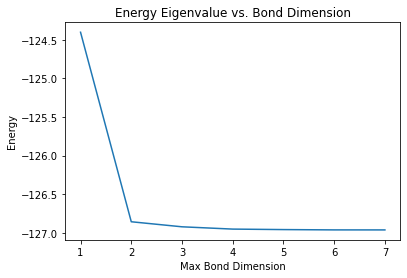

In [4]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression

In [3]:
data = init.initialize_random_normed_vector(length=1024)

In [4]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

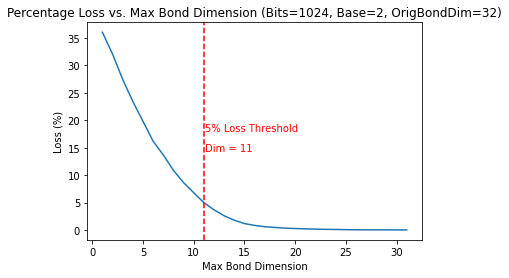

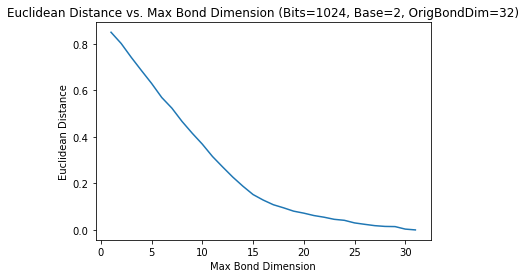

In [5]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=1)